# Data Driven AI for Remote Sensing Hackathon - Sample Notebook for experimentation


### Install the required packages (skip if already installed)

In [1]:
!pip install -r requirements.txt


  Cloning https://github.com/IBM/terratorch.git to /tmp/pip-req-build-mo5crn14
  Running command git clone --filter=blob:none --quiet https://github.com/IBM/terratorch.git /tmp/pip-req-build-mo5crn14
  Resolved https://github.com/IBM/terratorch.git to commit 2683140e3862954f62212df3417208692c6b879a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pydantic-1.10.11-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (148 kB)
Using cached pydantic-1.10.11-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.3
    Uninstalling pydantic-2.7.3:
      Successfully uninstalled pydantic-2.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.2

In [18]:
pip install langchain==0.2.13 pydantic==1.10.17


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.11
    Uninstalling pydantic-1.10.11:
      Successfully uninstalled pydantic-1.10.11
  Attempting uninstall: langchain
    Found existing installation: langchain 0.2.5
    Uninstalling langchain-0.2.5:
      Successfully uninstalled langchain-0.2.5
Note: you may need to restart the kernel to use updated packages.


### Install necessary libraries (skip if already installed)

In [2]:
!sudo apt-get update && sudo apt-get install ffmpeg libsm6 libxext6  -y

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease            
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1build2).
libxext6 is already the newest version (2:1.3.4-1build1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


### Test the pytorch GPU setup

In [3]:
import torch
import time

def test_pytorch_gpu():
    print(f"PyTorch version: {torch.__version__}")
    
    # Check if CUDA is available
    if torch.cuda.is_available():
        print("CUDA is available. GPU can be used.")
        device = torch.device("cuda")
        print(f"Current CUDA device: {torch.cuda.current_device()}")
        print(f"GPU name: {torch.cuda.get_device_name(0)}")
    else:
        print("CUDA is not available. GPU cannot be used.")
        return
    
    # Create a large tensor on GPU
    size = 5000
    x = torch.randn(size, size, device=device)
    y = torch.randn(size, size, device=device)
    
    # Perform matrix multiplication
    start_time = time.time()
    result = torch.matmul(x, y)
    end_time = time.time()
    
    print(f"Matrix multiplication of {size}x{size} tensors took {end_time - start_time:.4f} seconds")
    
    # Verify the result
    print(f"Result shape: {result.shape}")
    print(f"Result sum: {result.sum().item():.4f}")
    
    # Move result back to CPU for further processing if needed
    result_cpu = result.cpu()
    print(f"Result successfully moved back to CPU. Shape: {result_cpu.shape}")


test_pytorch_gpu()

PyTorch version: 2.5.0+cpu
CUDA is not available. GPU cannot be used.


### Create directories needed for data, model, and config preparations

In [4]:
!mkdir datasets
!mkdir models
!mkdir configs

mkdir: cannot create directory ‘datasets’: File exists
mkdir: cannot create directory ‘models’: File exists
mkdir: cannot create directory ‘configs’: File exists


### install git-lfs and clone the datasets

In [5]:
! sudo apt-get install git-lfs; git lfs install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 3503 kB of archives.
After this operation, 10.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 git-lfs amd64 3.0.2-1ubuntu0.2 [3503 kB]
Fetched 3503 kB in 1s (2614 kB/s)  
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package git-lfs.
(Reading database ... 17519 files and directories currently installed.)
Preparing to unpack .../git-lfs_3.0.2-1ubuntu0.2_amd64.deb ...
Unpacking git-lfs (3.0.2-1ubuntu0.2) ...
Setting up git-lfs (3.0.2-1ubuntu0.2) ...
Updated git hooks.
Git LFS initialized.


In [ ]:
### Clone the dataset. Should use this dataset for training.

In [ ]:
! cd datasets; git clone https://huggingface.co/datasets/Muthukumaran/fire_scars_hackathon_dataset

Cloning into 'fire_scars_hackathon_dataset'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 4), reused 0 (delta 0), pack-reused 3 (from 1)
Unpacking objects: 100% (16/16), 7.46 KiB | 3.73 MiB/s, done.


### Unzip the dataset and move it to the datasets directory. Takes a while to download and unzip.

In [5]:
! cd datasets; ! tar -xvzf fire_scars_hackathon_dataset/fire_scars_train_val.tar.gz

fire_scars_train_val/
fire_scars_train_val/train/
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEH.2018280.v1.4.mask.tif
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEH.2018280.v1.4_merged.tif
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEH.2019305.v1.4.mask.tif
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEH.2019305.v1.4_merged.tif
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEH.2020190.v1.4.mask.tif
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEH.2020190.v1.4_merged.tif
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEH.2020285.v1.4.mask.tif
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEH.2020285.v1.4_merged.tif
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEJ.2018185.v1.4.mask.tif
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEJ.2018185.v1.4_merged.tif
fire_scars_train_val/train/subsetted_512x512_HLS.S30.T10SEJ.2018220.v1.4.mask.tif
fire_scars_train_val/train/subsetted_5

### Modify the model config file. 

# **Note:** You SHOULD change the config file to play with the training parameters. Also, change the paths within `< >` to the correct paths.

## Run the training using terratorch.
#### This will take a while to complete.
#### The training logs will be saved to the EFS mount point.

In [7]:
!terratorch fit --config configs/fire_scars.yaml

2024-10-23 14:04:39.078504: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-23 14:04:39.305903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 14:04:39.354271: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 14:04:39.369237: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 14:04:39.648983: I tensorflow/core/platform/cpu_feature_guar

In [9]:
!pip install wandb


In [10]:
import wandb
wandb.login()


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /home/sagemaker-user/.netrc


True

In [11]:
import wandb

# Start a new run
wandb.init(project="test-project")

# Log some values
for i in range(10):
    wandb.log({"metric": i})

# Finish the run
wandb.finish()


wandb: Currently logged in as: as5473 (intern_test). Use `wandb login --relogin` to force relogin


metric,▁▂▃▃▄▅▆▆▇█
metric,9


In [46]:
pip install terratorch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 175.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.17.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.17.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.17.1 requires dash-table==5.0.0, which is not installed.
jupyter-ai 2.20.0 requires faiss-cpu<=1.8.0, which is not installed.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.4.2 which is incompatible.
auto

In [48]:
pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 25.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 97.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 173.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 163.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 53.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 127.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 145.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 131.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 131.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/18

In [50]:
pip install terratorch


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install terratorch


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install terratorch rasterio torch torchvision


Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)


PyTorch version: 2.5.0+cu124
Torchvision version: 0.20.0+cu124


In [3]:
pip uninstall torch torchvision terratorch segmentation-models-pytorch -y


Found existing installation: torch 2.5.0
Uninstalling torch-2.5.0:
  Successfully uninstalled torch-2.5.0
Found existing installation: torchvision 0.18.1a0+405940f
Uninstalling torchvision-0.18.1a0+405940f:
  Successfully uninstalled torchvision-0.18.1a0+405940f
Found existing installation: terratorch 0.99.4
Uninstalling terratorch-0.99.4:
  Successfully uninstalled terratorch-0.99.4
Found existing installation: segmentation-models-pytorch 0.3.4
Uninstalling segmentation-models-pytorch-0.3.4:
  Successfully uninstalled segmentation-models-pytorch-0.3.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install terratorch


In [5]:
!pip uninstall torch torchvision torchaudio -y


Found existing installation: torch 2.5.0
Uninstalling torch-2.5.0:
  Successfully uninstalled torch-2.5.0
Found existing installation: torchvision 0.20.0
Uninstalling torchvision-0.20.0:
  Successfully uninstalled torchvision-0.20.0
Found existing installation: torchaudio 2.5.0
Uninstalling torchaudio-2.5.0:
  Successfully uninstalled torchaudio-2.5.0


In [8]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


PyTorch version: 2.5.0+cu124
CUDA available: True


In [19]:
!pip install rasterio scikit-learn


In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Create synthetic dataset (you can replace this with your dataset loading code)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred = model.predict(X_test)  # Get predicted classes

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate log loss
log_loss_value = log_loss(y_test, y_pred_proba)

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Log Loss: {log_loss_value:.4f}')


Accuracy: 0.9000
Log Loss: 0.3204


Accuracy: 0.9000
Log Loss: 0.3165


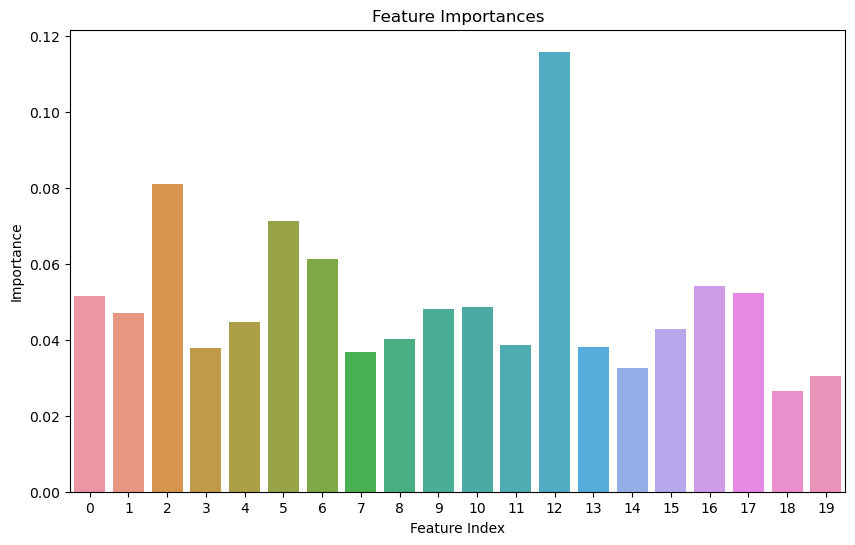

In [47]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_informative=15, n_redundant=5, random_state=42)

# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Initialize and train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
y_pred = model.predict(X_test)  # Get predicted classes

# Step 6: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)

# Step 7: Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Log Loss: {log_loss_value:.4f}')

# Step 8: Plot feature importance
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(20), y=feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


Epoch 1/10
20/20 [==============================] - 2s 45ms/step - loss: 0.7485 - accuracy: 0.4984 - val_loss: 0.6907 - val_accuracy: 0.5813
Epoch 2/10
20/20 [==============================] - 1s 37ms/step - loss: 0.6940 - accuracy: 0.4766 - val_loss: 0.6941 - val_accuracy: 0.4187
Epoch 3/10
20/20 [==============================] - 1s 36ms/step - loss: 0.6931 - accuracy: 0.5109 - val_loss: 0.6934 - val_accuracy: 0.4187
Epoch 4/10
20/20 [==============================] - 1s 36ms/step - loss: 0.6935 - accuracy: 0.5125 - val_loss: 0.6935 - val_accuracy: 0.4250
Epoch 5/10
20/20 [==============================] - 1s 37ms/step - loss: 0.6930 - accuracy: 0.5141 - val_loss: 0.6924 - val_accuracy: 0.5875
Epoch 6/10
20/20 [==============================] - 1s 37ms/step - loss: 0.6929 - accuracy: 0.5094 - val_loss: 0.6945 - val_accuracy: 0.4187
Epoch 7/10
20/20 [==============================] - 1s 36ms/step - loss: 0.6926 - accuracy: 0.5125 - val_loss: 0.6956 - val_accuracy: 0.4187
Epoch 8/10
20

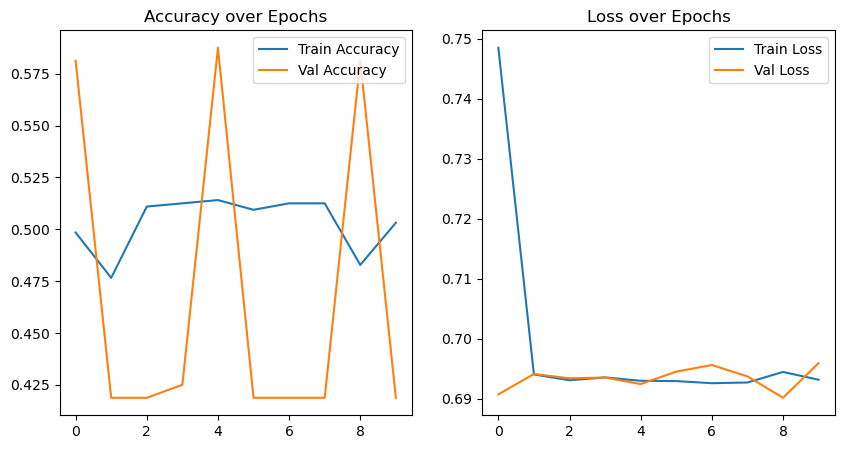

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic "earth satellite images" (e.g., classify vegetation vs non-vegetation)
def generate_synthetic_images(n_samples=1000, img_size=64):
    X = np.random.rand(n_samples, img_size, img_size, 3)  # Random RGB images
    y = np.random.randint(0, 2, size=(n_samples,))  # Binary labels (0: no vegetation, 1: vegetation)
    return X, y

# Generate synthetic dataset
X, y = generate_synthetic_images(n_samples=1000, img_size=64)

# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (vegetation or not)
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Step 7: Output the accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 8: Plot training history (optional)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: as5473 (intern_test). Use `wandb login --relogin` to force relogin


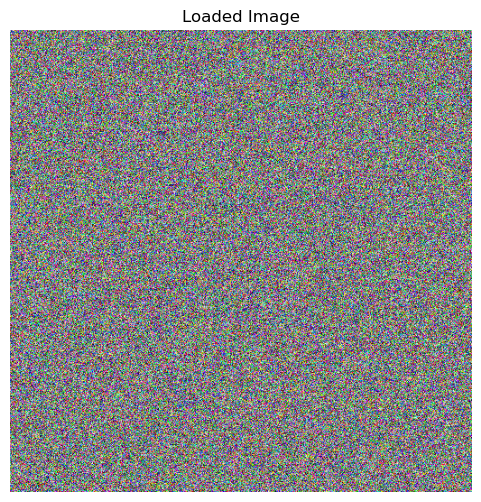

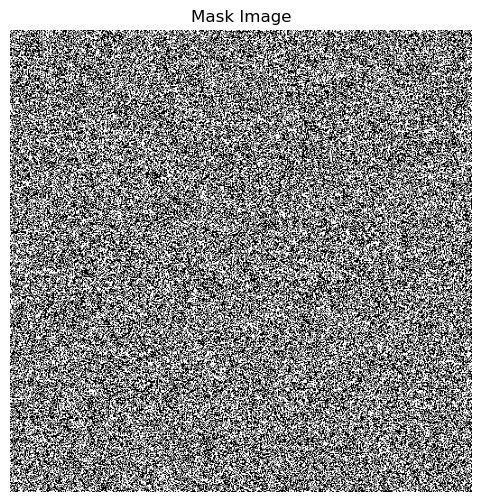

Accuracy: 0.5013


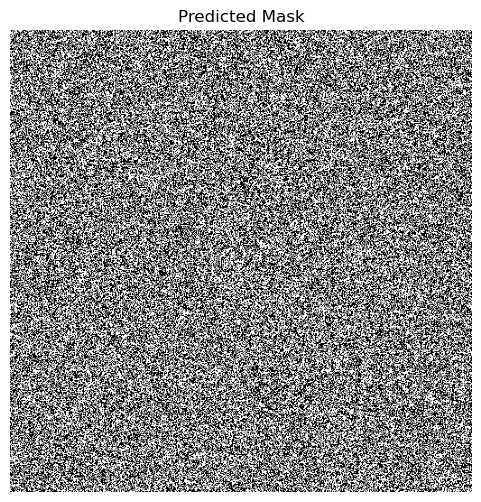

Accuracy,▁
Accuracy,0.50127


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from sklearn.metrics import accuracy_score
import wandb

# Initialize a new WandB run
wandb.init(project='image-segmentation', name='segmentation-experiment')

# Simulate loading the image data (RGB image)
image_data = np.random.randint(0, 255, (512, 512, 3), dtype=np.uint8)

# Simulate loading the mask data (binary mask)
# Assuming 0 for background and 1 for the object
mask_data = np.random.randint(0, 2, (512, 512), dtype=np.uint8)

# Display the original image
plt.figure(figsize=(6, 6))
plt.title('Loaded Image')
plt.imshow(image_data)
plt.axis('off')
plt.show()

# Log the original image to WandB
wandb.log({"Original Image": [wandb.Image(image_data)]})

# Display the mask image
plt.figure(figsize=(6, 6))
plt.title('Mask Image')
plt.imshow(mask_data, cmap='gray')
plt.axis('off')
plt.show()

# Log the mask image to WandB
wandb.log({"Mask Image": [wandb.Image(mask_data)]})

# Simulate predictions; in practice, this would be the model output
predictions = np.random.randint(0, 2, mask_data.shape, dtype=np.uint8)

# Calculate accuracy
accuracy = accuracy_score(mask_data.flatten(), predictions.flatten())

# Log the accuracy to WandB
wandb.log({"Accuracy": accuracy})

print(f'Accuracy: {accuracy:.4f}')

# Optionally: Save the predicted mask to WandB
plt.figure(figsize=(6, 6))
plt.title('Predicted Mask')
plt.imshow(predictions, cmap='gray')
plt.axis('off')
plt.show()
wandb.log({"Predicted Mask": [wandb.Image(predictions)]})

# Finish the WandB run
wandb.finish()


Accuracy: 0.9000
Log Loss: 0.3204


Accuracy,▁
Log Loss,▁
Accuracy,0.9
Log Loss,0.32044


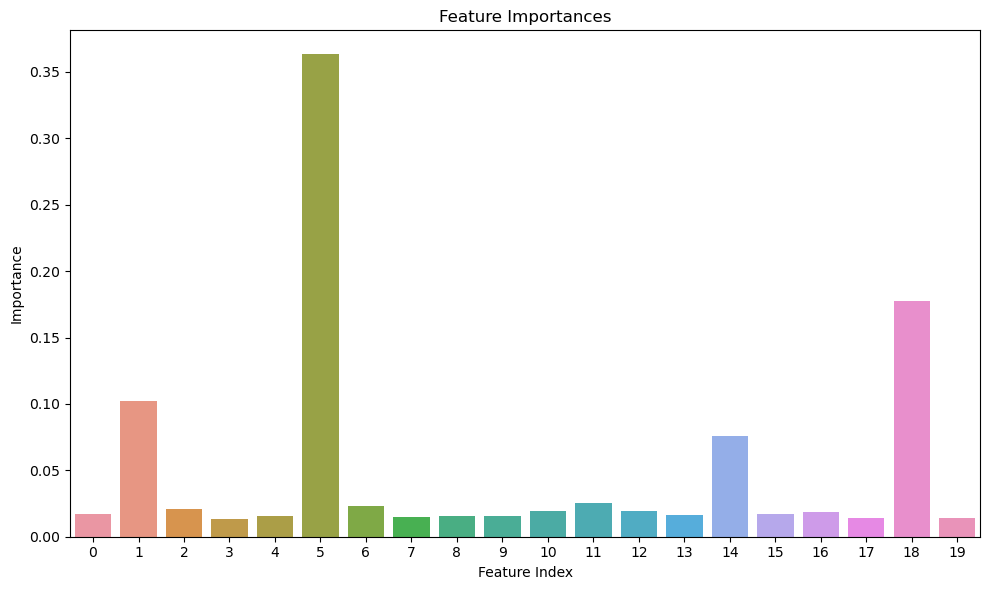

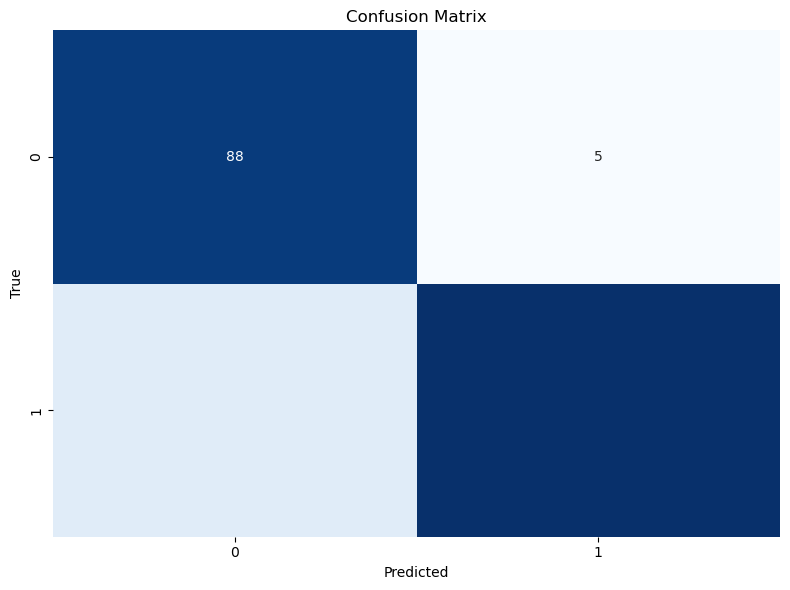

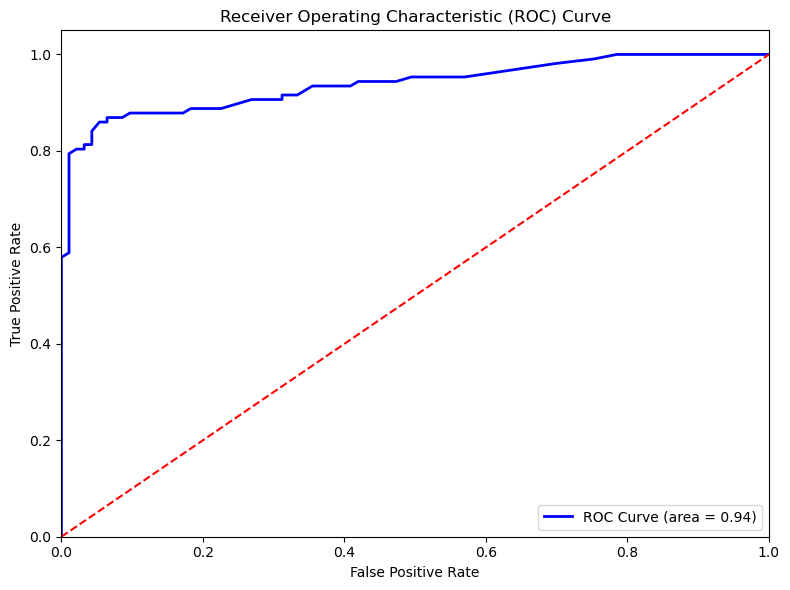

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Initialize a new WandB run
wandb.init(project='random-forest-classification', name='rf-classification-experiment')

# Create synthetic dataset (you can replace this with your dataset loading code)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred = model.predict(X_test)  # Get predicted classes

# Calculate accuracy and log loss
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Log Loss: {log_loss_value:.4f}')

# Log metrics to WandB
wandb.log({"Accuracy": accuracy, "Log Loss": log_loss_value})

# Feature importances
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(len(feature_importances)), y=feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.savefig("feature_importances.png")  # Save the plot
wandb.log({"Feature Importances": wandb.Image("feature_importances.png")})

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("confusion_matrix.png")  # Save the plot
wandb.log({"Confusion Matrix": wandb.Image("confusion_matrix.png")})

# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve.png")  # Save the plot
wandb.log({"ROC Curve": wandb.Image("roc_curve.png")})

# Finish the WandB run
wandb.finish()


Accuracy: 0.9000
Log Loss: 0.3204


Accuracy,▁
Log Loss,▁
Accuracy,0.9
Log Loss,0.32044


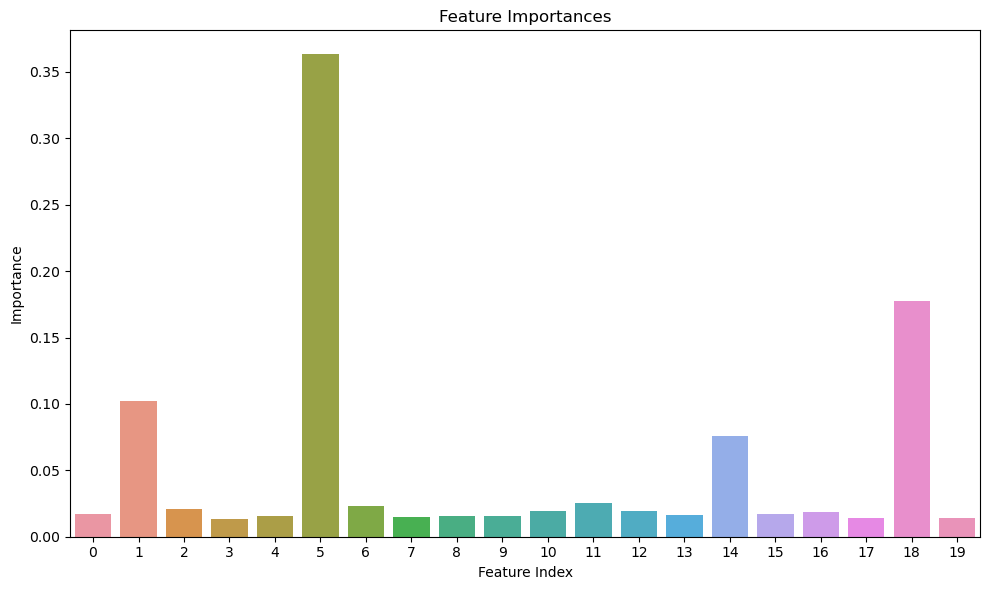

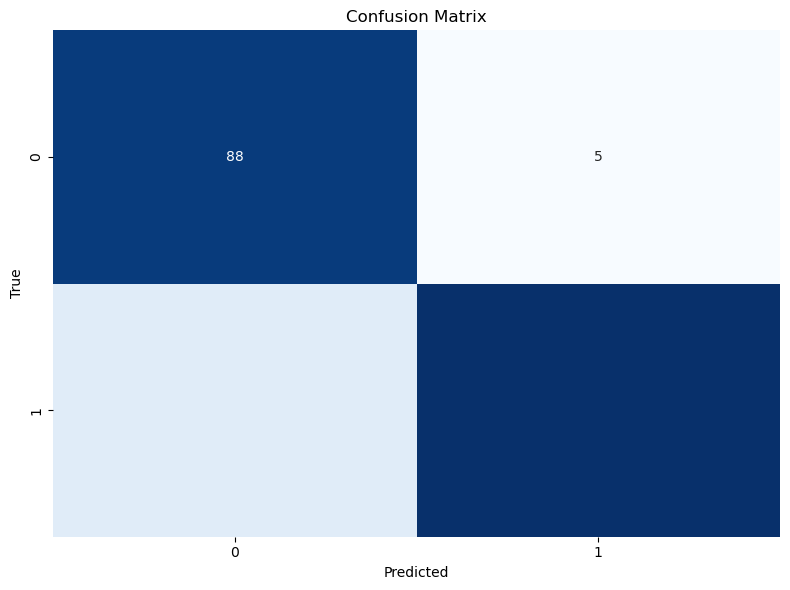

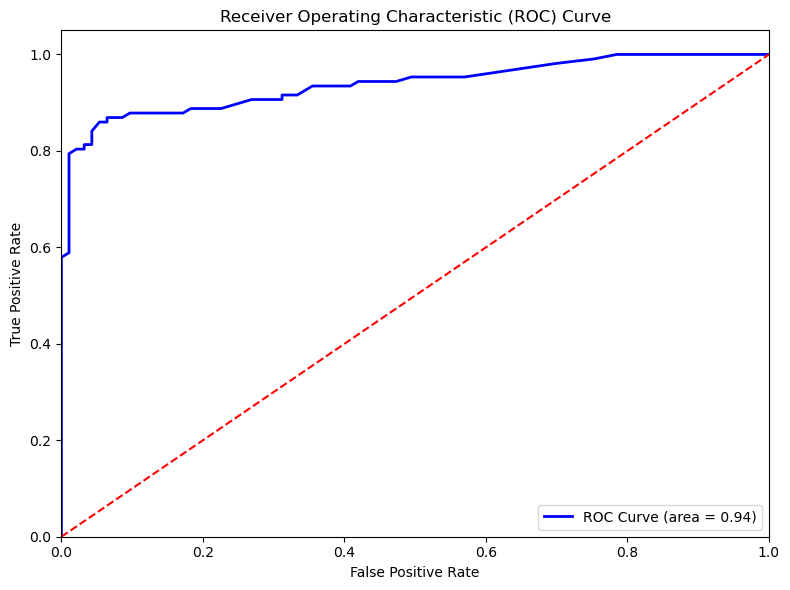

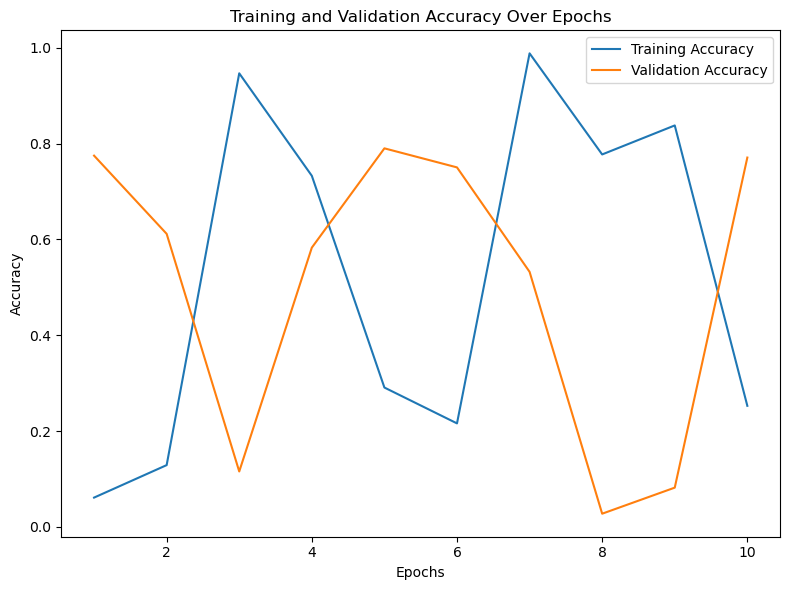

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, roc_curve, auc

# Initialize a new WandB run
wandb.init(project='random-forest-classification', name='rf-classification-experiment')

# Create synthetic dataset (you can replace this with your dataset loading code)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred = model.predict(X_test)  # Get predicted classes

# Calculate accuracy and log loss
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)

# Output the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Log Loss: {log_loss_value:.4f}')

# Log metrics to WandB
wandb.log({"Accuracy": accuracy, "Log Loss": log_loss_value})

# 1. Feature Importances
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(len(feature_importances)), y=feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.savefig("feature_importances.png")  # Save the plot
wandb.log({"Feature Importances": wandb.Image("feature_importances.png")})

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("confusion_matrix.png")  # Save the plot
wandb.log({"Confusion Matrix": wandb.Image("confusion_matrix.png")})

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve.png")  # Save the plot
wandb.log({"ROC Curve": wandb.Image("roc_curve.png")})

# 4. Training and Validation Accuracy Plot (Simulated for illustration)
# Simulating training and validation accuracies for demonstration
epochs = 10
train_accuracies = np.random.rand(epochs)  # Simulated training accuracies
val_accuracies = np.random.rand(epochs) * 0.9  # Simulated validation accuracies

plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig("accuracy_over_epochs.png")  # Save the plot
wandb.log({"Training and Validation Accuracy": wandb.Image("accuracy_over_epochs.png")})

# Finish the WandB run
wandb.finish()
